In [4]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']

In [6]:
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', C = 10) ## C is Regulation Term(L2 penalty)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

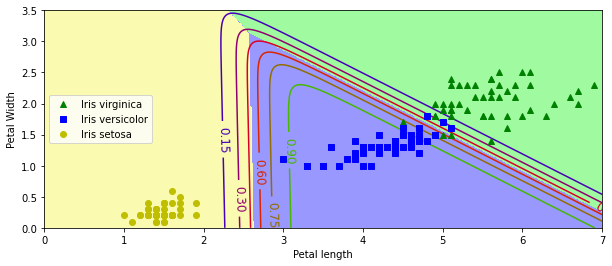

In [25]:
import numpy as np
import matplotlib.pyplot as plt

X0, X1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1)
)
X_new = np.c_[X0.ravel(), X1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zzl = y_proba[:, 1].reshape(X0.shape)
zz = y_predict.reshape(X0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(X0, X1, zz, cmap = custom_cmap)
contour = plt.contour(X0, X1, zzl, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize = 12)
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.legend(loc = 'center left')
plt.axis([0, 7, 0, 3.5])
plt.show()

In [31]:
len(zzl.reshape(X0.shape))

200